# Bank Marketing Model

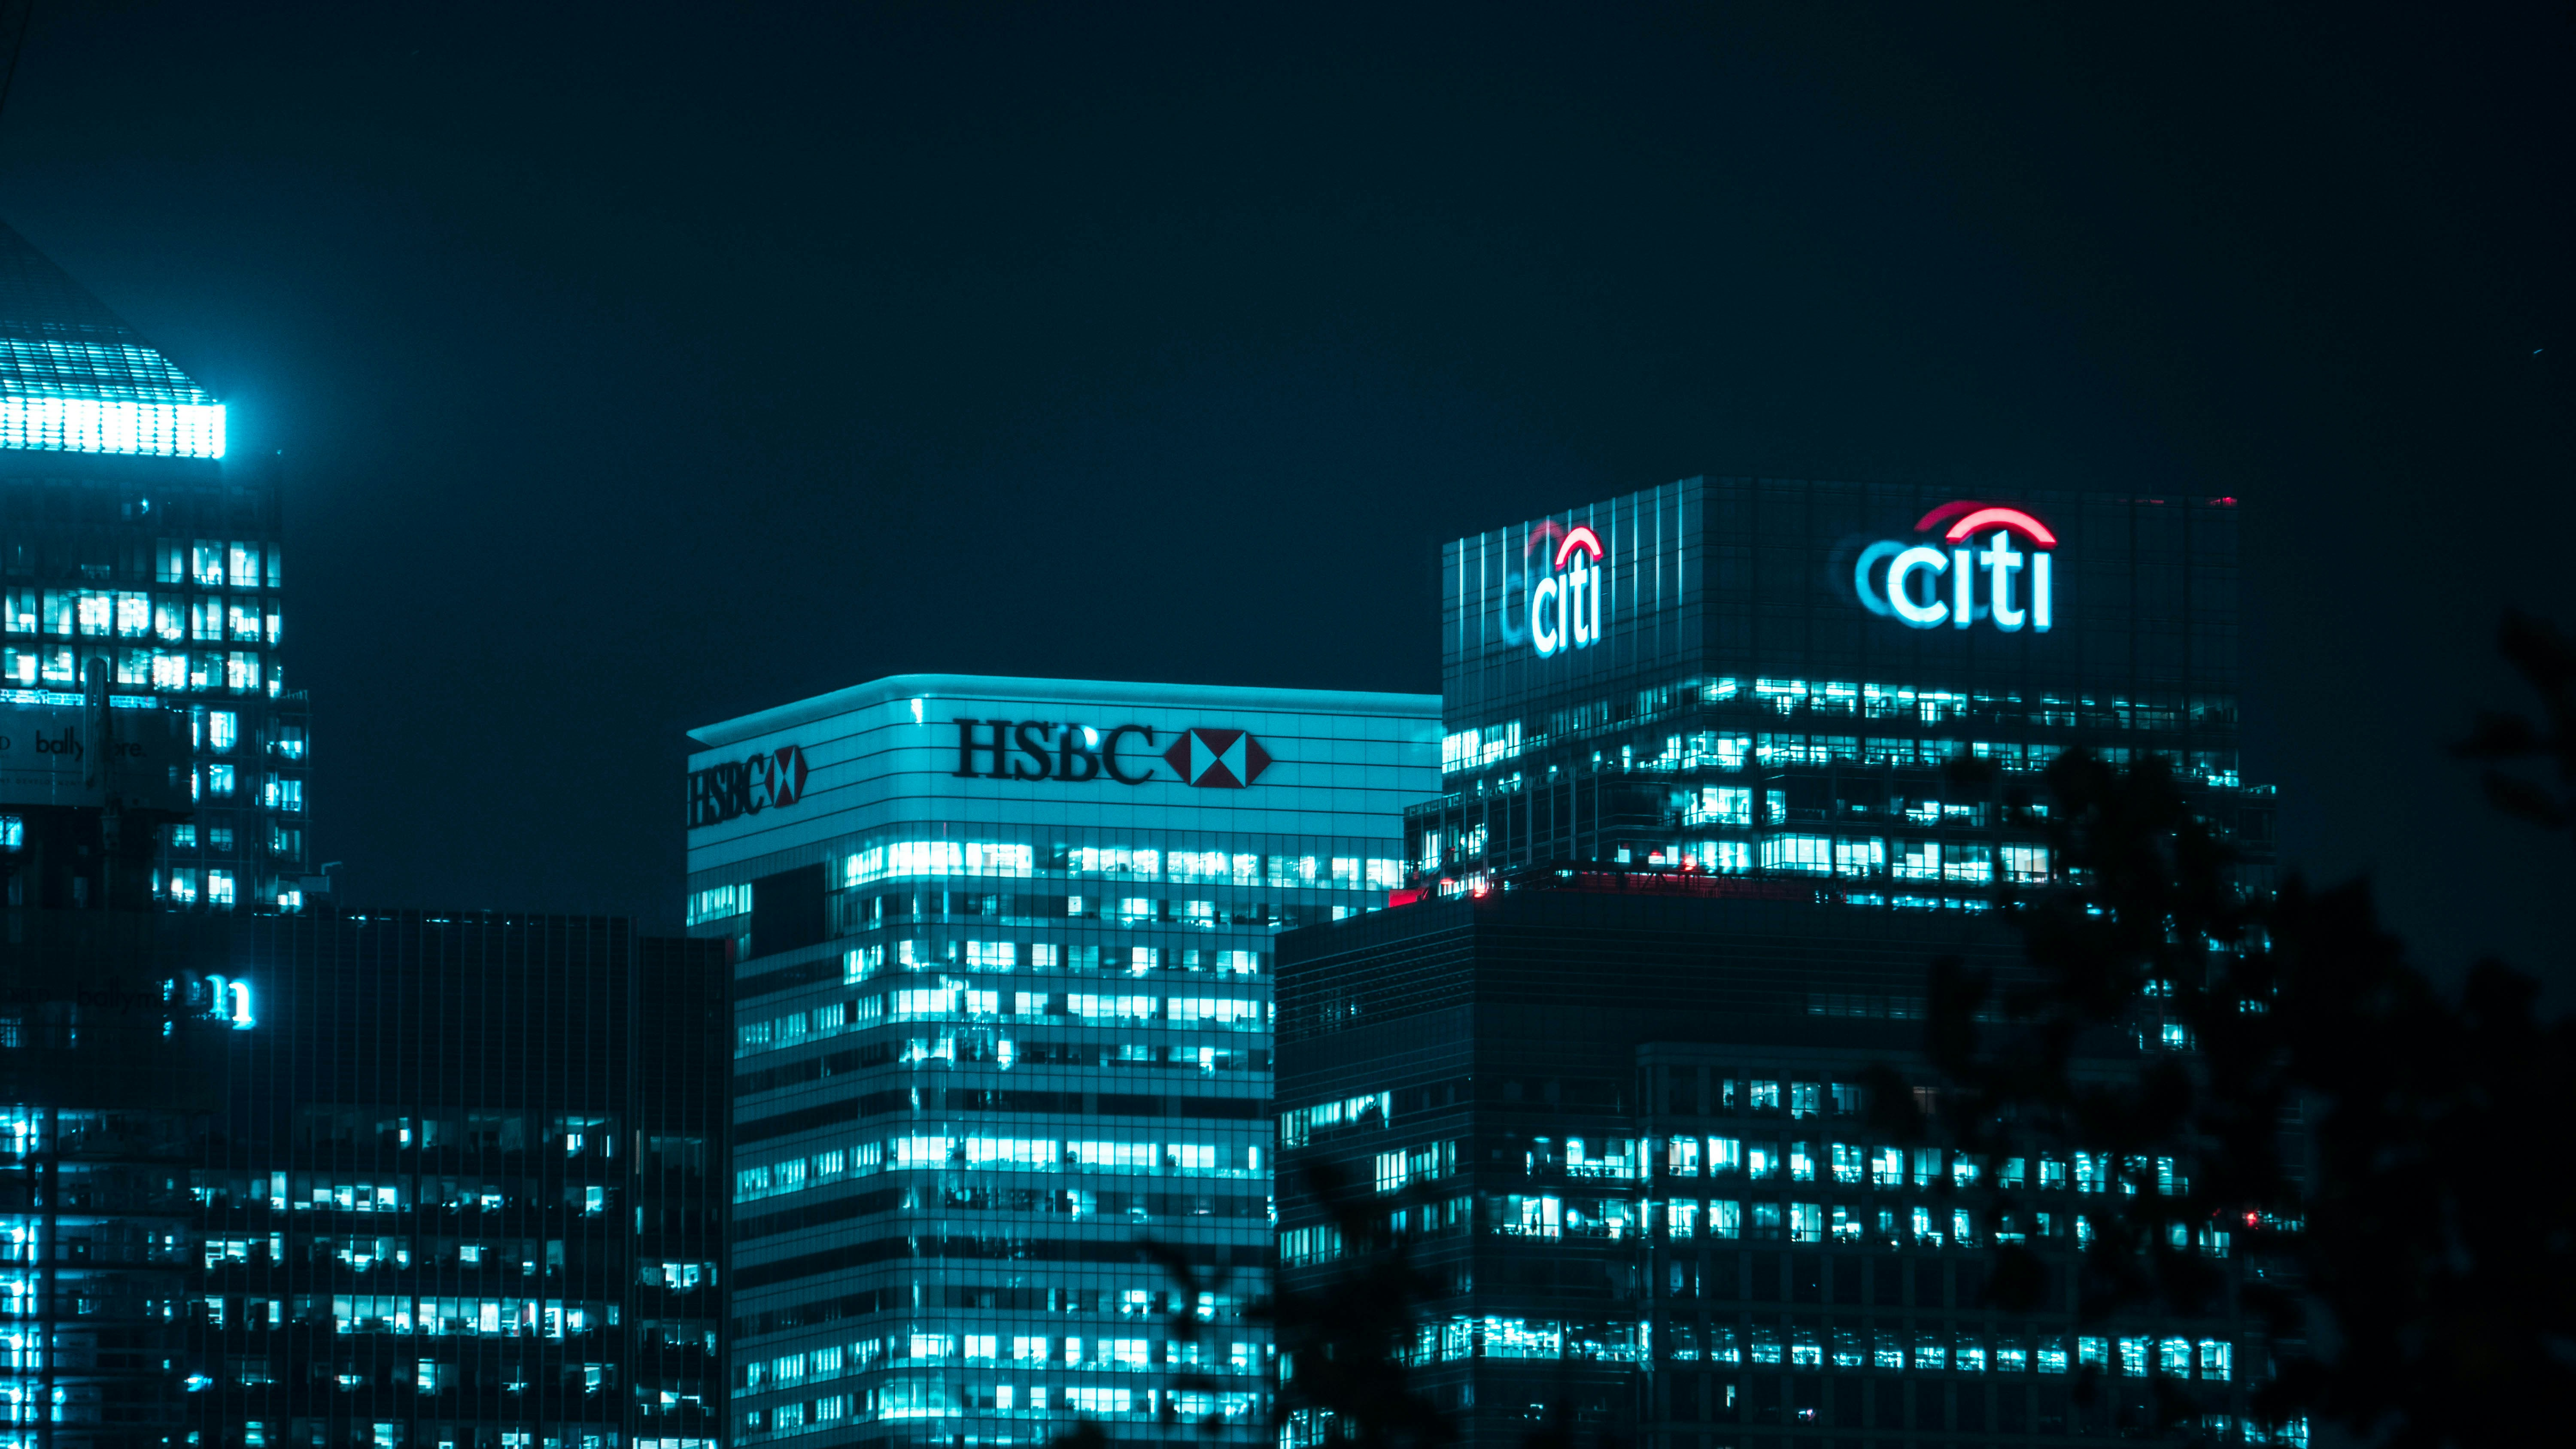

# Introduction

A retail bank in Portugal was studied, utilizing data collected, thus encompassing the impacts of the recent financial crisis. We examined a vast array of features pertaining to bank clients, products, and socio-economic attributes, and a total of 17 features was used in this study. Additionally, we compared 7 different models: Logistic Regression, Decision Trees (DT), Random Forest, Support Vector Machine (SVM), Gradient Boosting, K-Nearest Neighboors and Naive Bayes. 

The problem and the objetive of this project are described below.

## Variable Description

1. **`age`**: Age of the client (numeric)

2. **`job`**: Job of the client (categorical - "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")

3. **`marital`**: Marital status of the client (categorical: "married", "divorced", "single"; note: "divorced" means divorced or widowed)

4. **`education `**: Level of education of the client (categorical: "unknown", "secondary", "primary", "tertiary")

5. **`default`**: If the client had problems payind debts defore (binary: "yes", "no")

6. **`balance`**: : average yearly balance, in euros (numeric)

7. **`housing`**: Client has housing loan? (binary: "yes","no")

8. **`loan`**: Client has personal loan? (binary: "yes","no")

9. **`contact`**: contact communication type (categorical: "unknown", "telephone", "cellular") 

10. **`day`**: last contact day of the month (numeric)

11. **`month`**: last contact month of year (categorical: "jan", "feb", ..., "nov", "dec")

12. **`duration`**: last contact duration, in seconds (numeric)
     
13. **`campaign`**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
         
14. **`pdays`**: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15. **`previous`**: number of contacts performed before this campaign and for this client (numeric)

16. **`poutcome`**: outcome of the previous marketing campaign (categorical: "unknown", "other", "failure", "success")

17. **`y`**: has the client subscribed a term deposit? (binary: 'yes','no')

# Problem Definition

> **Problem & objective**
The goal is to use all this information to predict whether someone will end up saving money with the bank. This helps the bank decide which feature to focus to get more money from the customers.

## 0.0 Imports

In [1]:
# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

# classic libs for data manipulation
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt
import statsmodels.api   as sm

# libs used for machine learning
from sklearn.preprocessing    import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection  import train_test_split
from sklearn.metrics          import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.tree             import DecisionTreeClassifier 
from sklearn.ensemble         import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.svm              import SVC
from sklearn.neighbors        import KNeighborsClassifier
from sklearn.naive_bayes      import GaussianNB
from sklearn.metrics          import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics          import roc_auc_score, precision_recall_curve

In [2]:
df = pd.read_excel("/Users/jonatas/Documents/repos/Bank_Marketing/Bank Dataset_Logistic Regression.xlsx")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df1 = df.copy()

## 1.1 Data Dimensions

In [6]:
print("Number of Rows: {}".format(df1.shape[0]))
print("Number of Cols: {}".format(df1.shape[1]))

Number of Rows: 45211
Number of Cols: 17


## 1.2 Data Types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## 1.3 Checking NA

In [8]:
df1.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## 1.4 Duplicate Data

In [9]:
df.duplicated().sum()

0

In [10]:
df1['month'].value_counts()

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

There aren't no duplicated observations or missing values. Also the observations seems to be ok, without inconsistencies.

# 2.0 Exploratory Data Analysis

## 2.1 Univariate Analysis

In [11]:
df1 = df.copy()

### 2.1.1 Numerical Variables

In [12]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])

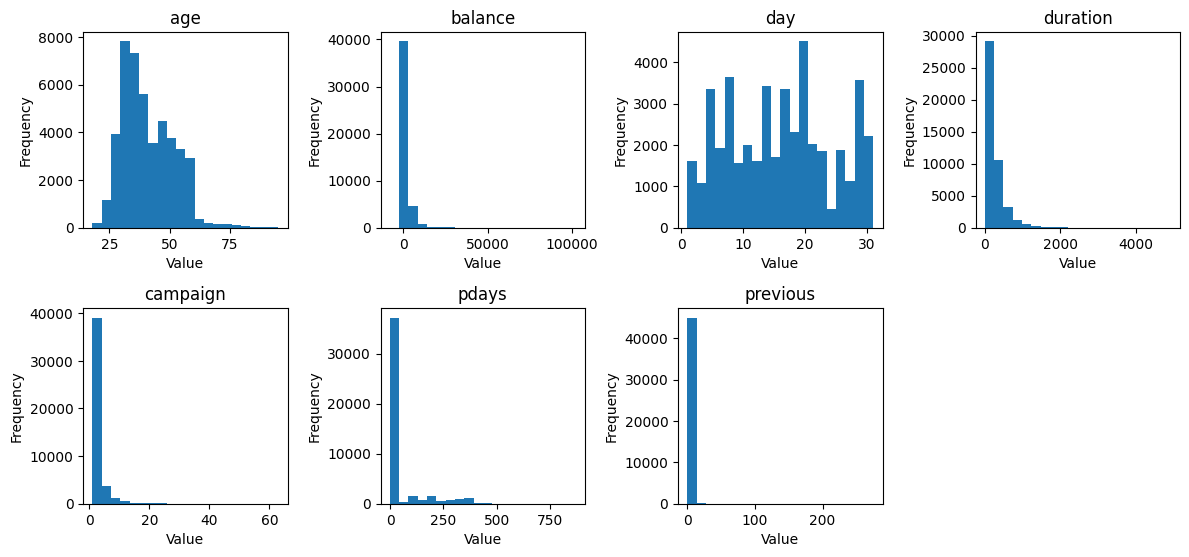

In [13]:
plt.figure(figsize=(12,8))

for i, column in enumerate(num_attributes, 1):
    plt.subplot(3,4,i)
    plt.hist(df1[column], bins=20)
    plt.title(column)
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### 2.1.2 Categorical Variables

In [14]:
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

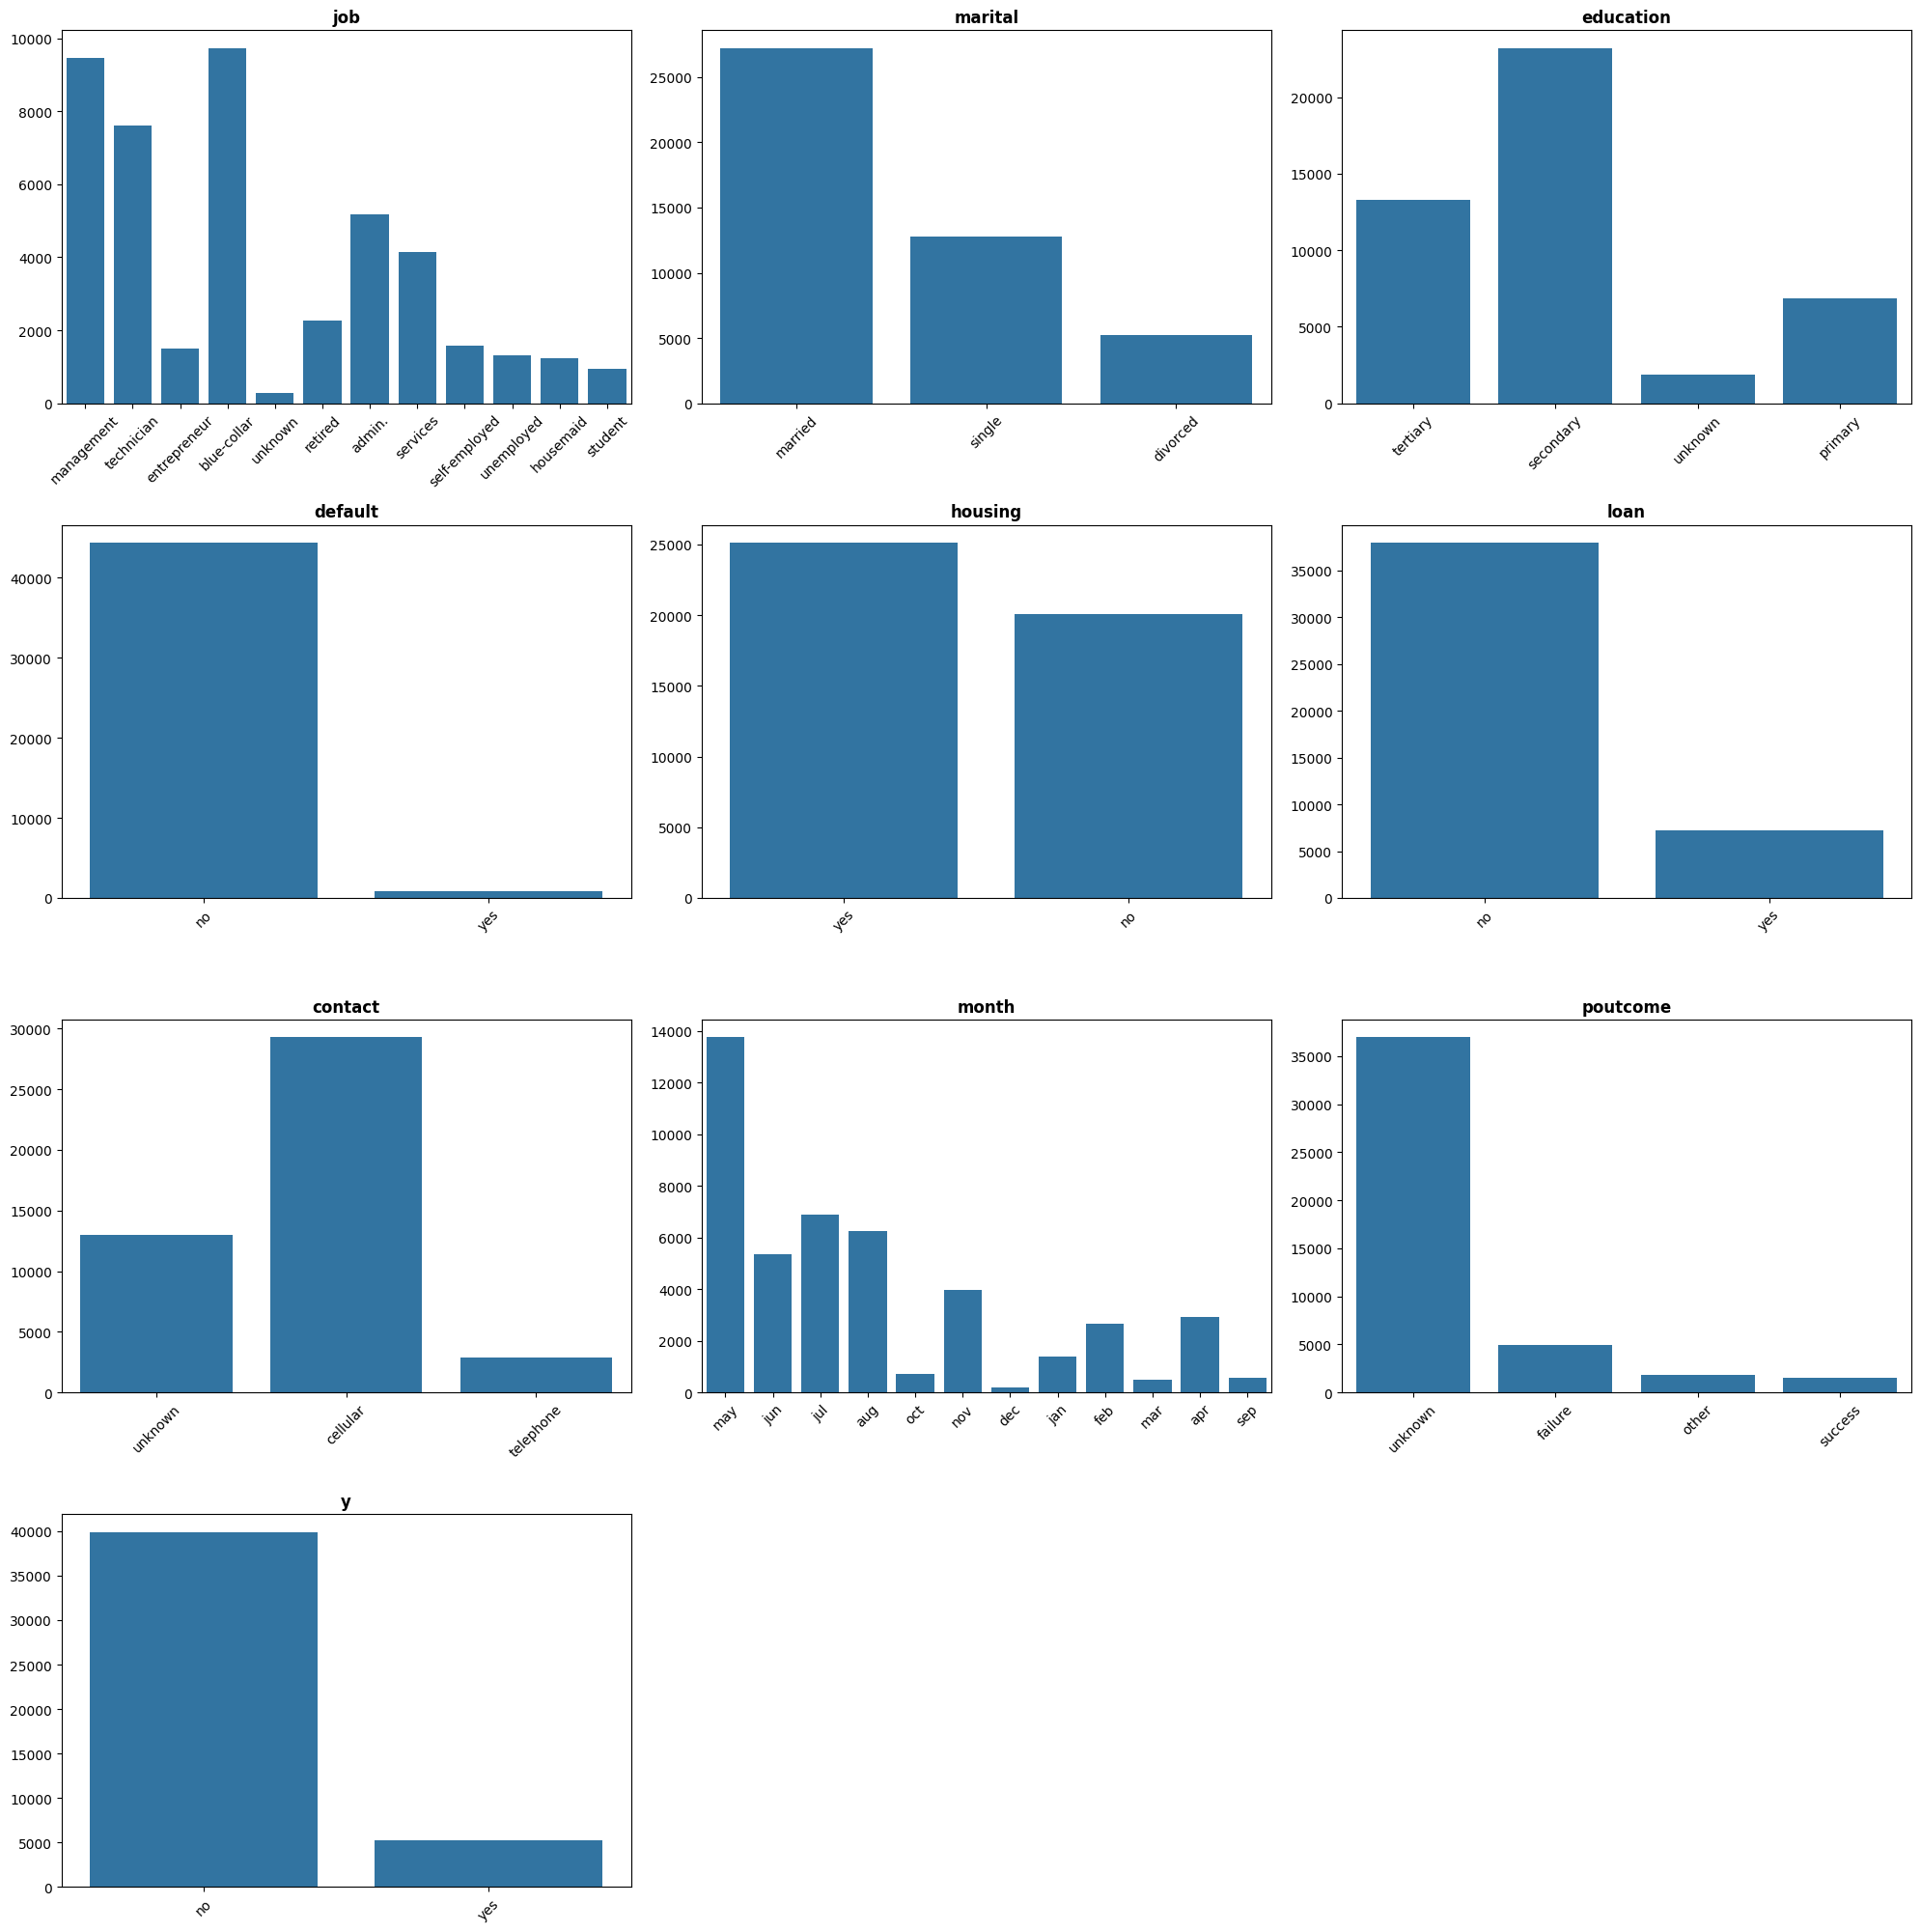

In [15]:
plt.figure(figsize=(20,30))

for i, column in enumerate(cat_attributes, 1):
    plt.subplot(6,3,i)
    sns.countplot(data=df1, x=column)
    plt.title(column, fontweight='bold')
    plt.xlabel(None)
    plt.ylabel(None)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 2.2 Bivariate Analysis

### 2.2.1 Numerical Variables

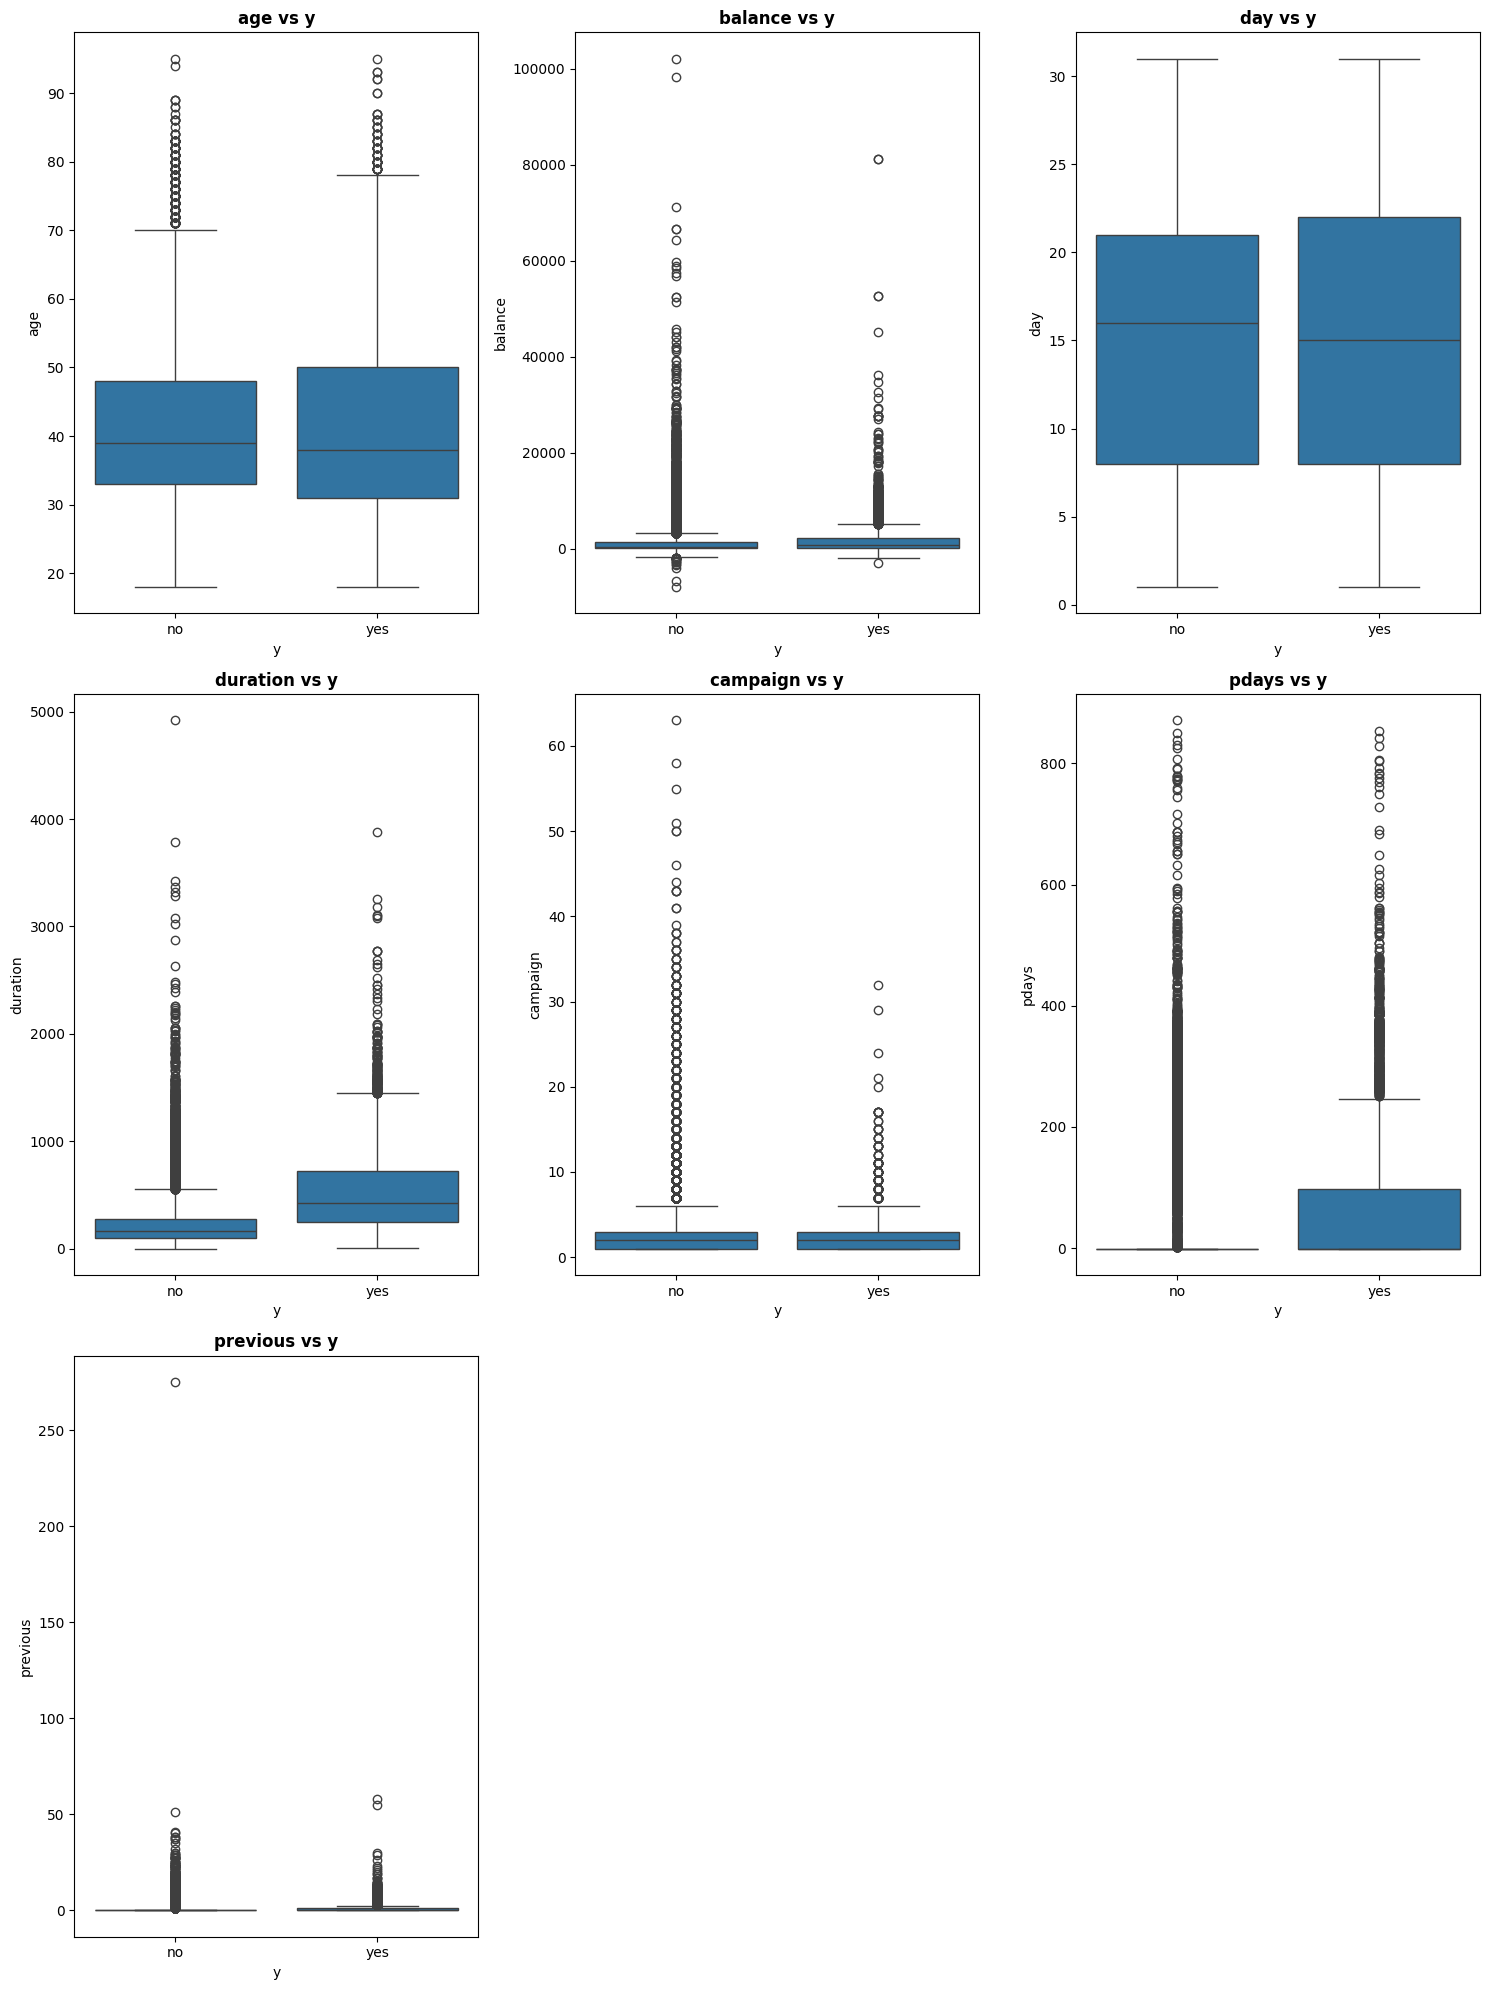

In [16]:
plt.figure(figsize=(15,20))
for i, column in enumerate (num_attributes, 1):
    plt.subplot(3,3,i)
    sns.boxplot(data=df1, x = 'y', y = column)
    plt.title(f'{column} vs y', fontweight='bold')

plt.tight_layout()
plt.show()

**Conclusions:**

1. The longer it takes to persuade a customer, the higher the likelihood of the customer subscribing to a term deposit.
2. The younger demographic (under the age of 50-60) has a greater likelihood of subscribing to a term deposit.

### 2.2.2 Categorical Variables

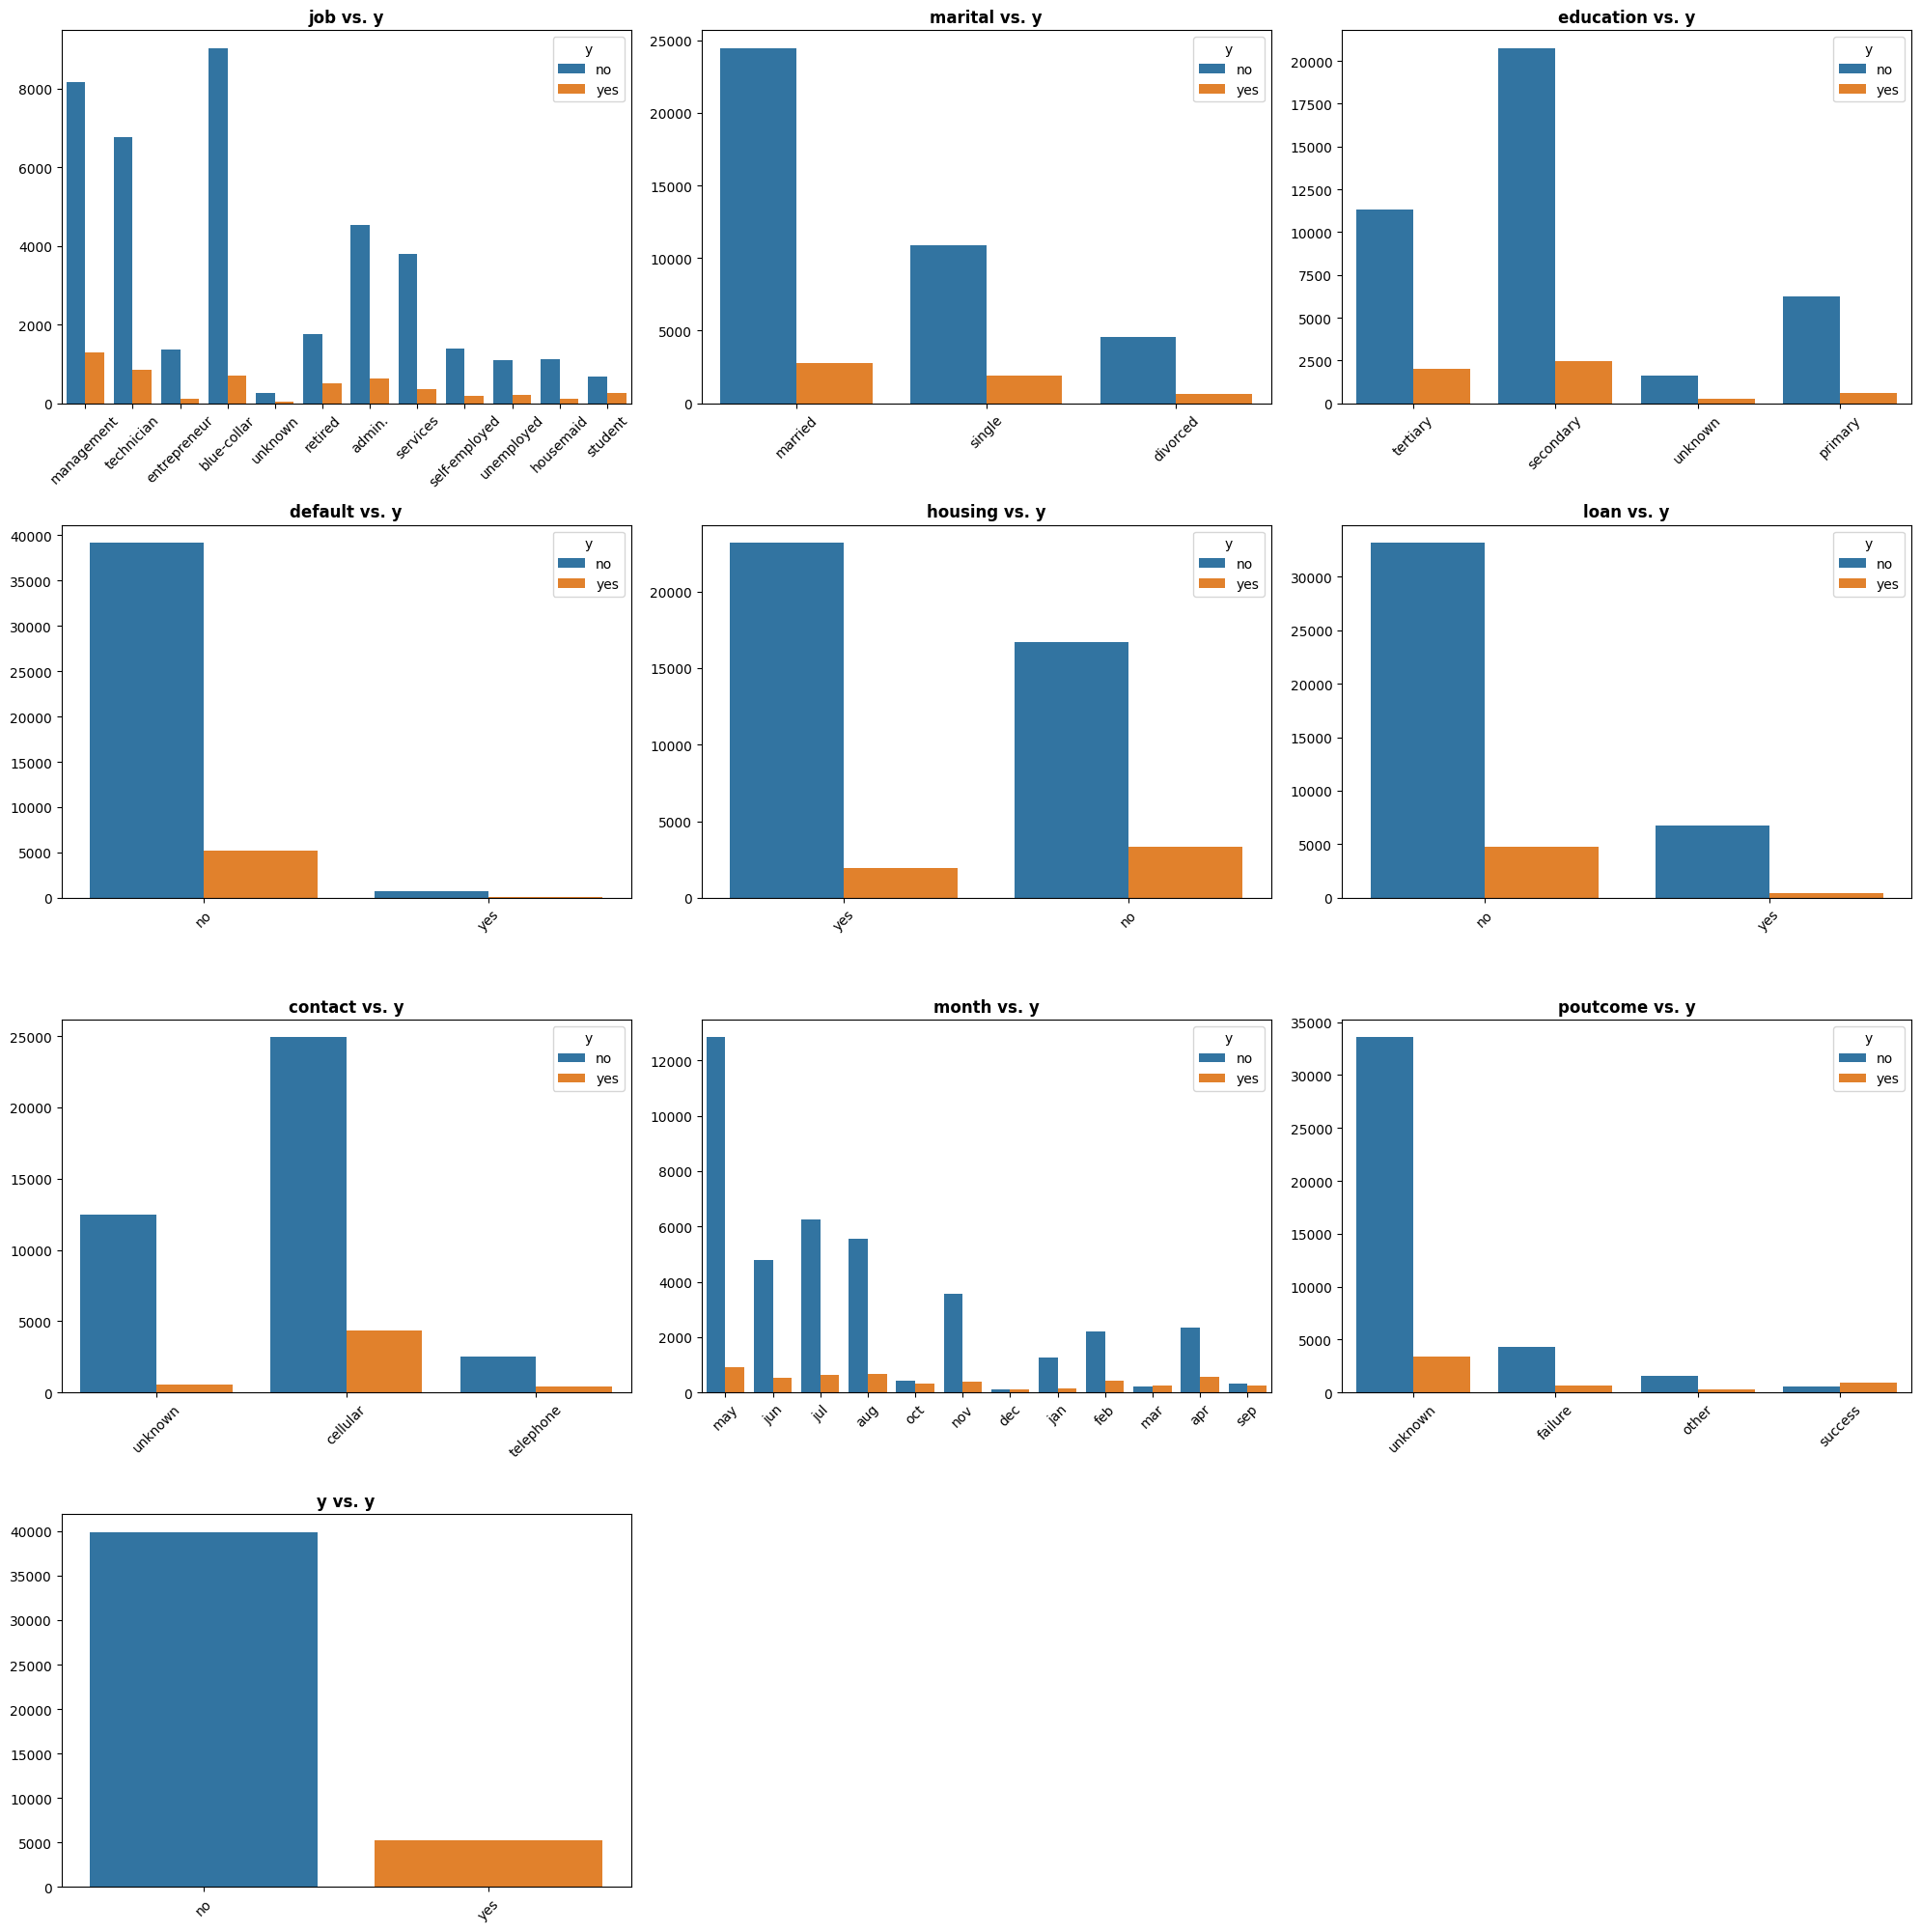

In [17]:
plt.figure(figsize=(20,30))
for i, column in enumerate(cat_attributes, 1):
    plt.subplot(6,3,i)
    sns.countplot(data=df1, x=column, hue='y')
    plt.title(f'{column} vs. y', fontweight='bold')
    plt.xlabel(None)
    plt.ylabel(None)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Conclusions:**
1. Cellular communication tends to be more effective in convincing customers to subscribe to a term deposit.
2. In general, managers are significantly more inclined to subscribe to a term deposit compared to individuals in other fields.
3. Single customers show a greater propensity to utilize term deposits, even though their numbers are lower than those of married customers.
4. Customers without housing loans are more likely to opt for a term deposit.
5. Customers with a secondary education are significantly more inclined to utilize a term deposit.
6. Customers who have defaulted on credit payments typically do not have a term deposit subscription.

## 2.3 Descriptive Statistics

In [18]:
# Central tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#dispersion - std, min, max, rangge, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

In [19]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,age,18.0,95.0,77.0,40.936210,39.0,10.618645,0.684818,0.319570
1,balance,-8019.0,102127.0,110146.0,1362.272058,448.0,3044.732156,8.360308,140.751547
2,day,1.0,31.0,30.0,15.806419,16.0,8.322384,0.093079,-1.059897
3,duration,0.0,4918.0,4918.0,258.163080,180.0,257.524964,3.144318,18.153915
4,campaign,1.0,63.0,62.0,2.763841,2.0,3.097987,4.898650,39.249651
5,pdays,-1.0,871.0,872.0,40.197828,-1.0,100.127639,2.615715,6.935195
6,previous,0.0,275.0,275.0,0.580323,0.0,2.303416,41.846454,4506.860660


## 2.4 Correlation Matrix

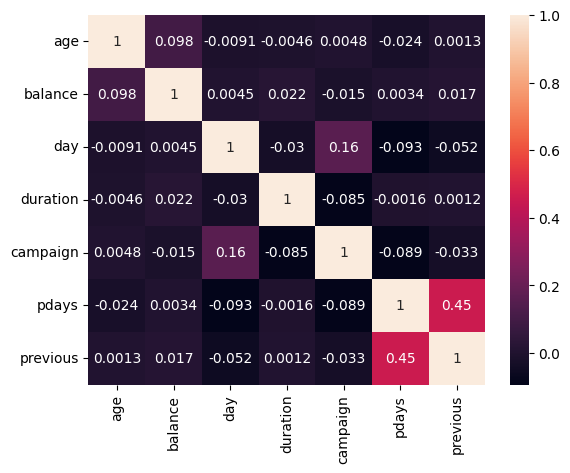

In [20]:
correlations = num_attributes.corr(method='pearson')
sns.heatmap(correlations, annot=True);

# 3.0 Data Preparation

In [21]:
df2 = df1.copy()

In [22]:
df2.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [23]:
df2['marital'].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [24]:
df2['housing'].value_counts()

housing
yes    25130
no     20081
Name: count, dtype: int64

In [25]:
# drop age 
df2 = df2.drop(columns=['age'])

## 3.1 Encoding

In [26]:
# Init LabelEncoder
le = LabelEncoder()

for column in cat_attributes:
    df2[column] = le.fit_transform(df2[column])

df2.head()

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


## 3.2 Feature Scaling

In [27]:
# cols dropped = month and outcome
num_columns = ['job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'duration', 
                      'campaign', 'pdays', 'previous', 'y']

#mms = MinMaxScaler
rs = RobustScaler()

# Init StandardScaler
#sc = StandardScaler()

df2[num_columns] = rs.fit_transform(df2[num_columns])
df2.head()

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.000000,0.0,1.0,0.0,1.250000,0.0,0.0,1.0,-0.846154,8,0.375000,-0.5,0.0,0.0,3,0.0
1,0.833333,1.0,0.0,0.0,-0.308997,0.0,0.0,1.0,-0.846154,8,-0.134259,-0.5,0.0,0.0,3,0.0
2,-0.333333,0.0,0.0,0.0,-0.328909,0.0,1.0,1.0,-0.846154,8,-0.481481,-0.5,0.0,0.0,3,0.0
3,-0.500000,0.0,2.0,0.0,0.780236,0.0,0.0,1.0,-0.846154,8,-0.407407,-0.5,0.0,0.0,3,0.0
4,1.166667,1.0,2.0,0.0,-0.329646,-1.0,0.0,1.0,-0.846154,8,0.083333,-0.5,0.0,0.0,3,0.0


# 4.0 Machine Learning Modelling

In [28]:
df3 = df2.copy()

In [29]:
# split the data
X = df3.drop(columns=['y'])
y = df3['y']

# 80% Train; 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Trainig shape:", X_train.shape, y_train.shape)
print("Testing shape:", X_test.shape, y_test.shape)

Trainig shape: (36168, 15) (36168,)
Testing shape: (9043, 15) (9043,)


## 4.1 Logistic Regression

Accuracy: 0.8863209112020347


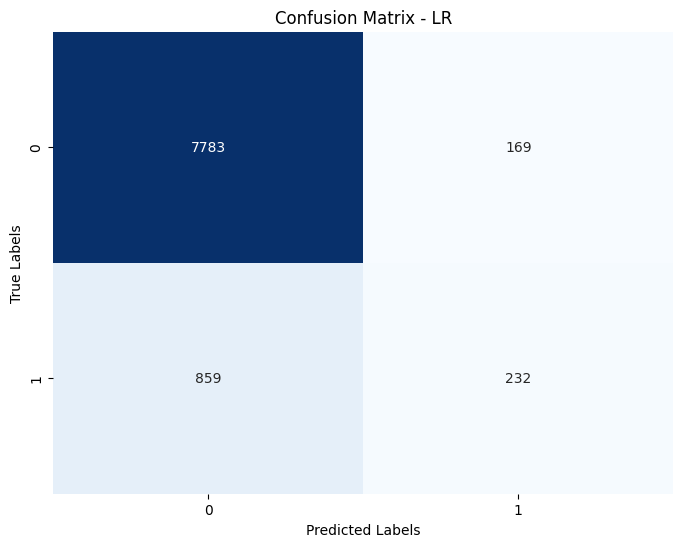

In [30]:
from sklearn.linear_model import LogisticRegression

#Instanciando o modelo
lr = LogisticRegression(random_state=42)

# Ajuste do modelo - dados de treinamento
lr.fit(X_train, y_train)

#Predizendo o modelo - dados de teste
y_hat_lr = lr.predict(X_test)

# calculando acurácia
acc = accuracy_score(y_test, y_hat_lr)
print("Accuracy:", acc)

# Confusion Matrix
matrix_lr = confusion_matrix(y_test, y_hat_lr)
plt.figure(figsize=(8,6))
sns.heatmap(matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - LR')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**The model classified 7783 instances of the negative class (TP) and 232 instances of the positive classe (yes)(TN). Also, the Logistic Regression model achieved and accuracy of 88,63%, and displayed strong capability in effectively categorizing the target variable.**

## 4.2 Decision Tree

Accuracy: 0.8752626340816101


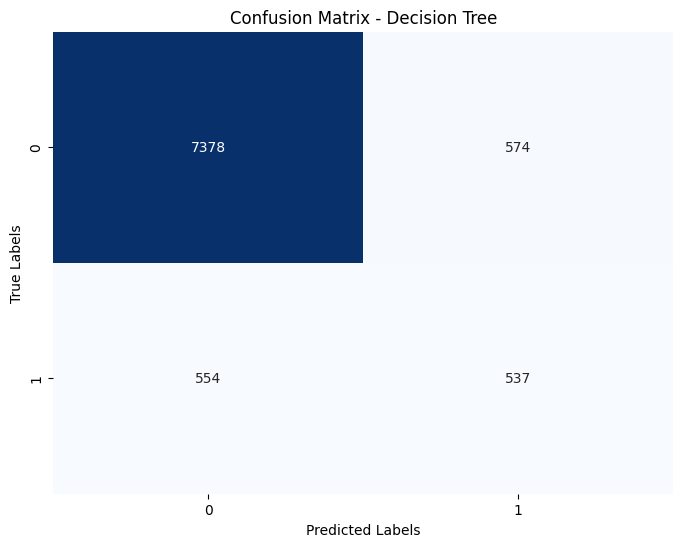

In [31]:
dt = DecisionTreeClassifier()

# train decision tree
dt.fit(X_train, y_train)

# prediction on test dataset
y_hat_dt = dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_hat_dt)
print("Accuracy:", acc_dt)

# Confusion Matrix
matrix_dt = confusion_matrix(y_test, y_hat_dt)
plt.figure(figsize=(8,6))
sns.heatmap(matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**The decision Tree model scored and accuracy of 87,65%. It accurately identified 7380 cases of negative class and 547 cases of positive class**

## 4.3 Random Forest

Accuracy: 0.900807254229791


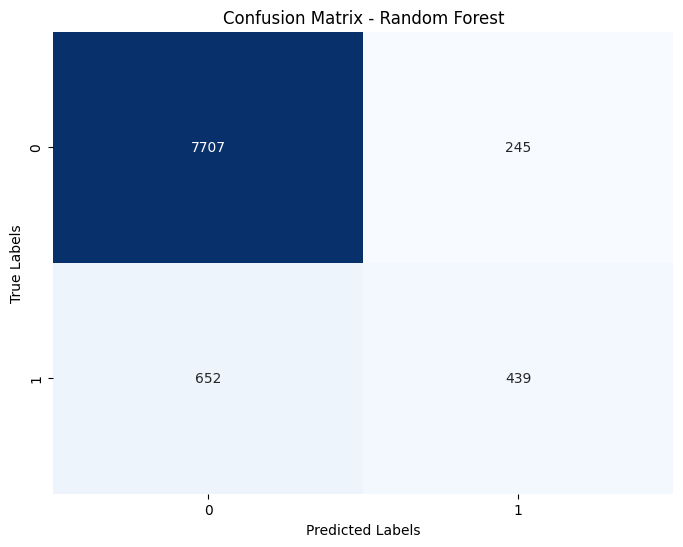

In [32]:
rf = RandomForestClassifier()

# Train classifier
rf.fit(X_train, y_train)

# prediction on test dataset
y_hat_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_hat_rf)
print("Accuracy:", acc_rf)

# Confusion Matrix
matrix_rf = confusion_matrix(y_test, y_hat_rf)
plt.figure(figsize=(8,6))
sns.heatmap(matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**The Random Forest scored and accuracy of 90,15%. It accurately identified 7728 cases of negative class and 424 cases of positive class**

## 4.4 SVM (Support Vector Machine)

Accuracy: 0.8793541966161672


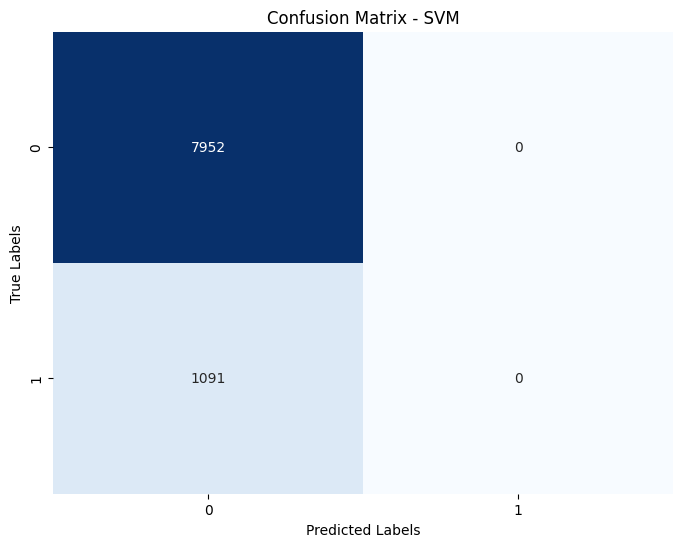

In [33]:
svm = SVC()

#Train Classifier
svm.fit(X_train, y_train)

# prediction on test dataset
y_hat_svm = svm.predict(X_test)

acc_svm = accuracy_score(y_test, y_hat_svm)
print("Accuracy:", acc_svm)

# Confusion Matrix
matrix_svm = confusion_matrix(y_test, y_hat_svm)
plt.figure(figsize=(8,6))
sns.heatmap(matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**The Support Vector Machine scored and accuracy of 87,93%. It accurately identified 7952 cases of negative classe and 0 cases of positive class**

## 4.5 Gradient Boosting

Accuracy: 0.9029083268826716


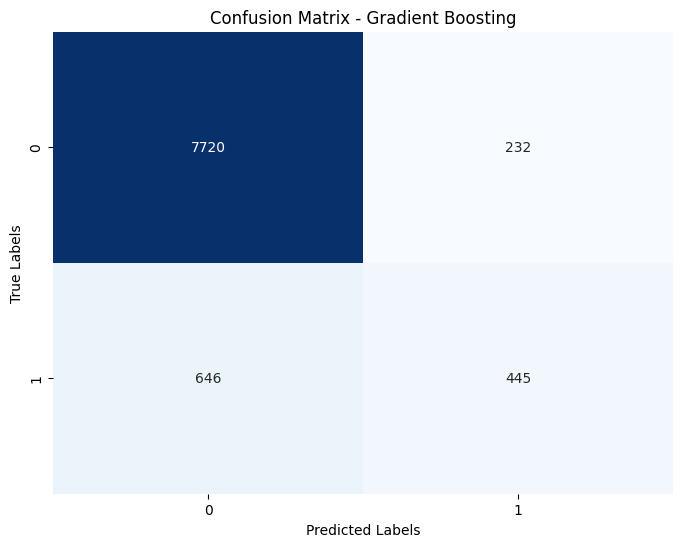

In [34]:
gb = GradientBoostingClassifier()

#Train classifier
gb.fit(X_train, y_train)

# prediction on test dataset
y_hat_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_hat_gb)
print("Accuracy:", acc_gb)

# Confusion Matrix
matrix_gb = confusion_matrix(y_test, y_hat_gb)
plt.figure(figsize=(8,6))
sns.heatmap(matrix_gb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**The Gradient Boosting scored an excellent accuracy of 90,29%. It accurately identified 7720 cases of negative classe and 445 cases of positive class**

## 4.6 KNN

Accuracy: 0.8920712153046555


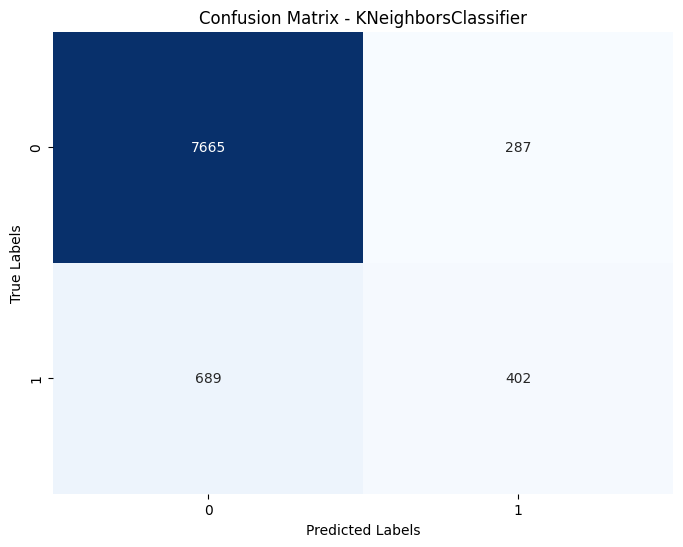

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)

#Train classifier
knn.fit(X_train, y_train)

# prediction on test dataset
y_hat_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_hat_knn)
print("Accuracy:", acc_knn)

# Confusion Matrix
matrix_knn = confusion_matrix(y_test, y_hat_knn)
plt.figure(figsize=(8,6))
sns.heatmap(matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - KNeighborsClassifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**The K Neighboors scored an accuracy of 89,20%. It accurately identified 7665 cases of negative classe and 402 cases of positive class**

## 4.7 Naive Bayes

Accuracy: 0.8238416454716355


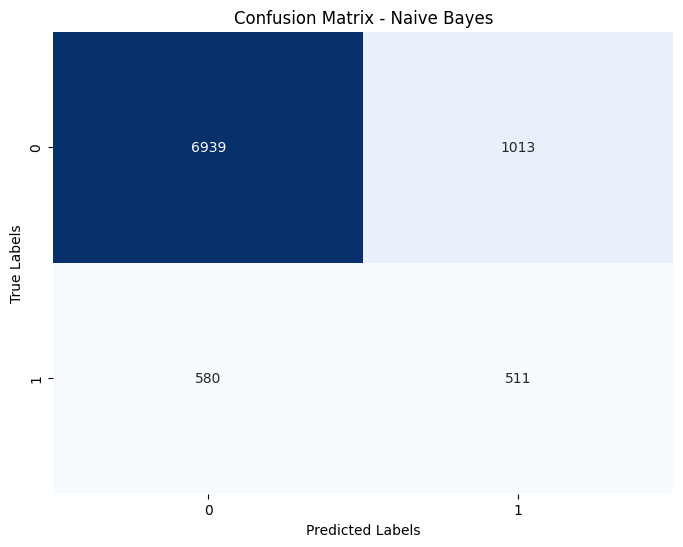

In [36]:
nb = GaussianNB()

#Train classifier
nb.fit(X_train, y_train)

# prediction on test dataset
y_hat_nb = nb.predict(X_test)

acc_nb = accuracy_score(y_test, y_hat_nb)
print("Accuracy:", acc_nb)

# Confusion Matrix
matrix_nb = confusion_matrix(y_test, y_hat_nb)
plt.figure(figsize=(8,6))
sns.heatmap(matrix_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**The Naive Bayes model scored an accuracy of 82,38%. It accurately identified 6939 cases of negative classe and 511 cases of positive class**

In [37]:
# Define the evaluation function
def evaluate_model(y_true, yhat):
    accuracy = accuracy_score(y_true, yhat)
    precision = precision_score(y_true, yhat)
    recall = recall_score(y_true, yhat)
    f1 = f1_score(y_true, yhat)
    return accuracy, precision, recall, f1

# Evaluate each classifier
classifiers = {
    "Logistic Regression": y_hat_lr,
    "Decision Tree": y_hat_dt,
    "Gradient Boosting": y_hat_gb,
    "Random Forest": y_hat_rf,
    "Support Vector Machine (SVM)": y_hat_svm,
    "K-Nearest Neighbors (KNN)": y_hat_knn,
    "Naive Bayes": y_hat_nb
}

for clf_name, y_pred in classifiers.items():
    accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)
    print(f"\n{clf_name}:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    


Logistic Regression:
Accuracy: 0.886
Precision: 0.579
Recall: 0.213
F1 Score: 0.311

Decision Tree:
Accuracy: 0.875
Precision: 0.483
Recall: 0.492
F1 Score: 0.488

Gradient Boosting:
Accuracy: 0.903
Precision: 0.657
Recall: 0.408
F1 Score: 0.503

Random Forest:
Accuracy: 0.901
Precision: 0.642
Recall: 0.402
F1 Score: 0.495

Support Vector Machine (SVM):
Accuracy: 0.879
Precision: 0.000
Recall: 0.000
F1 Score: 0.000

K-Nearest Neighbors (KNN):
Accuracy: 0.892
Precision: 0.583
Recall: 0.368
F1 Score: 0.452

Naive Bayes:
Accuracy: 0.824
Precision: 0.335
Recall: 0.468
F1 Score: 0.391


## 4.8 Summary of Results and ROC Curve

**Gradient Boosting and Random Forest are the best classifiers**

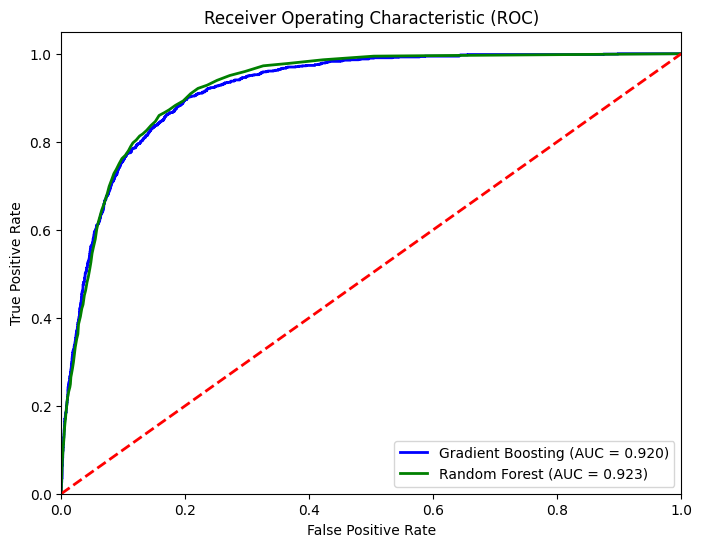

In [38]:
# Predict probabilities for Gradient Boosting
y_probs_gb = gb.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_probs_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Predict probabilities for Random Forest
y_probs_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='blue', lw=2, label='Gradient Boosting (AUC = %0.3f)' % roc_auc_gb)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.3f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## 4.9 Precision-Recall Curve

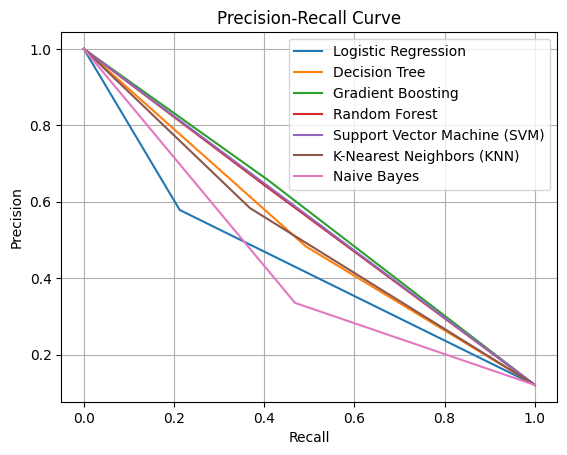

In [39]:
# function to plot precision x recall curve
def plot_precision_recall_curve(y_true, y_score, clf_name):
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    plt.plot(recall, precision, label=clf_name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.grid(True)

# plotting for each classifier
for clf_name, y_pred in classifiers.items():
    plot_precision_recall_curve(y_test, y_pred, clf_name)

plt.show()


# 5.0 Feature Importance 

## 5.1 Gradient Boosting

In [40]:
# Init GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

# importances
feature_importances_gb = gb_classifier.feature_importances_
fi_df_gb = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_gb})

# sorting importances
fi_df_gb = fi_df_gb.sort_values(by='Importance', ascending=False)

print("Gradient Boosting Feature Importance:")
print(fi_df_gb)

Gradient Boosting Feature Importance:
      Feature  Importance
10   duration    0.483972
9       month    0.139194
14   poutcome    0.114887
12      pdays    0.090746
7     contact    0.060054
5     housing    0.056778
8         day    0.016413
4     balance    0.009870
13   previous    0.009155
1     marital    0.005514
11   campaign    0.004443
6        loan    0.004358
2   education    0.002331
0         job    0.002285
3     default    0.000000


**Top 4 - Feauture importances - Gradient Boosting**

1. `duration` - This feature holds the utmost significance, suggesting that the duration of the call greatly influences the outcome.

2. `month` - The last contact in the month is a crucial factor.

3. `poutcome` - The result of the previous marketing campaing is also very important. 

4. `pdays` - The elapsed time since the client's last contact from a previous campaign is also an essential factor.

## 5.2 Random Forest

In [41]:
# Init RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# importances
feature_importances_rf = rf_classifier.feature_importances_
fi_df_rf = pd.DataFrame({'Feature': X_train.columns, 'Importances': feature_importances_rf})

# sorting importances
fi_df_rf = fi_df_rf.sort_values(by='Importances', ascending=False)

print("Random Forest Feature Importance: ")
print(fi_df_rf)

Random Forest Feature Importance: 
      Feature  Importances
10   duration     0.309715
4     balance     0.130151
8         day     0.106055
9       month     0.097853
0         job     0.060260
14   poutcome     0.052582
12      pdays     0.051038
11   campaign     0.045383
2   education     0.032121
5     housing     0.027664
1     marital     0.026930
7     contact     0.023705
13   previous     0.023181
6        loan     0.011212
3     default     0.002150


**Top 4 - Feauture importances - Random Forest**

1. `duration` - Likewise, the duration of the call remains as the primary predictor in the Random Forest model.

2. `balance` - A annual balance is also a very important feature that can influence the outcome using the random forest model. 

3. `day` - The last contact of a day contribute to the model.

4. `month` - The last contact in the month have it importance.